# Project 9 -Partial Correlations and Directed Acyclic Graphs
## Generating artificial data 

In [1]:
import random
import numpy as np
import pandas as pd

length = 100000
cols = ["P", "Q", "X", "Y", "Z"]
mu = 0
sigma = 5


lst_dct = {col:[] for col in cols}
for i in range(length):
    lst_dct["P"].append(25 + np.random.normal(mu, .5 * sigma))
    lst_dct["Q"].append(50 + np.random.normal(mu, sigma))
    lst_dct["X"].append(3 * lst_dct["Q"][-1]  + np.random.normal(mu, sigma ))
    lst_dct["Y"].append(lst_dct["Q"][-1] * -1 +  np.random.normal(mu, sigma))
    lst_dct["Z"].append(
        lst_dct["P"][-1] * 2 +  1.5 * lst_dct["X"][-1] -  lst_dct["Y"][-1] * 2 +  np.random.normal(mu,  sigma))

lst_dct

{'P': [30.36655435285528,
  21.239614963727202,
  26.362754482824446,
  29.29274243357356,
  26.74419058102269,
  19.854852004595244,
  26.26048609871924,
  26.09294479611536,
  20.33734075160882,
  21.897714727071836,
  23.915361727131646,
  27.500865603382046,
  23.948020025225656,
  25.42626516583909,
  28.097413559805474,
  21.78375929397295,
  30.404031729186126,
  29.07660702391935,
  31.185992680929814,
  25.888883736799546,
  24.117273098092564,
  26.685421188296356,
  28.959917302747172,
  24.79832958041296,
  24.49713768438651,
  27.58010024851643,
  26.140202470390694,
  23.540286817411427,
  24.82386510869243,
  25.668080742960296,
  25.588441250773784,
  18.206377686816396,
  23.025932369441335,
  24.042532181316748,
  21.183050694769396,
  23.508189609235465,
  30.82942977889697,
  25.178297072733518,
  22.61839118692171,
  23.71123391213286,
  23.971175524202366,
  23.07476080150157,
  21.999161231911003,
  23.736152817661075,
  25.92788413613684,
  23.2013212188431,
  2

In [2]:
df = pd.DataFrame(lst_dct)
df

P          Q           X          Y           Z
0      30.366554  53.969286  172.741695 -42.681555  407.396562
1      21.239615  52.406568  163.116978 -50.518173  378.240615
2      26.362754  52.093169  151.825935 -55.263435  387.366006
3      29.292742  55.154765  170.044156 -52.265032  416.248614
4      26.744191  54.431571  159.010656 -63.775620  413.635673
...          ...        ...         ...        ...         ...
99995  23.958712  59.010789  178.862387 -58.273770  427.118517
99996  27.578989  45.468155  134.719135 -41.847329  344.598141
99997  17.686830  46.706320  141.194636 -42.256116  330.922612
99998  27.482309  48.865253  142.215771 -41.722439  341.939226
99999  23.289205  48.959022  145.698785 -37.233098  332.352973

[100000 rows x 5 columns]

<AxesSubplot:xlabel='X', ylabel='Z'>

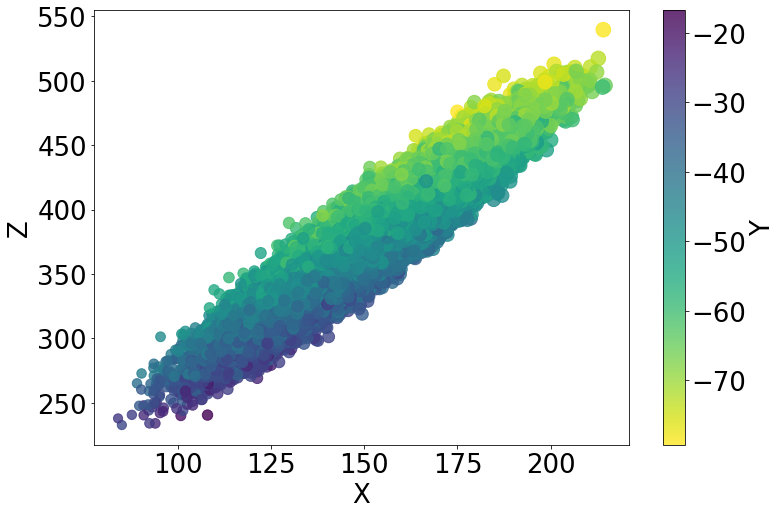

In [3]:
import matplotlib.pyplot as plt
# We can visualize the correlation of these variables on four dimensions:
#     2 dimensions in x-y space, a 3rd dimension using size and a fourth using color
plt.rcParams.update({"font.size":26})
fig, ax = plt.subplots(figsize = (12,8))
df.plot.scatter(x = "X", y = "Z", c = "Y",s = "X", cmap = "viridis_r",alpha = .8, ax = ax)

In [4]:
df.corr()

P         Q         X         Y         Z
P  1.000000  0.000661  0.002254  0.001100  0.141788
Q  0.000661  1.000000  0.948570 -0.706445  0.914086
X  0.002254  0.948570  1.000000 -0.670696  0.934336
Y  0.001100 -0.706445 -0.670696  1.000000 -0.845773
Z  0.141788  0.914086  0.934336 -0.845773  1.000000

In [5]:
import statsmodels.api as sm

residuals = {}
for y_var in df.keys():
    X_vars = list(df.keys())
    X_vars.remove(y_var)
    X = df [X_vars]
    X["Constant"] = 1
    y = df[[y_var]]
    model = sm.OLS(y, X)
    results = model.fit()
    print(results.summary())
    residuals[y_var] = results.resid
residuals = pd.DataFrame(residuals)

                            OLS Regression Results                            
Dep. Variable:                      P   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                 2.482e+04
Date:                Mon, 27 Jun 2022   Prob (F-statistic):               0.00
Time:                        09:23:15   Log-Likelihood:            -1.9943e+05
No. Observations:              100000   AIC:                         3.989e+05
Df Residuals:                   99995   BIC:                         3.989e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Q             -0.0029      0.004     -0.787      0.4

In [6]:
residuals

P         Q         X         Y         Z
0      2.093770 -1.555450  2.267064  3.182920  2.319024
1      0.593817 -1.224087  6.422364 -3.587677 -9.951441
2      1.603220  1.123390  0.290023 -2.092562 -3.641664
3      2.613327 -0.501980  2.256447 -0.168473 -1.863672
4      2.376043  0.737097  1.400544 -4.251298 -5.955687
...         ...       ...       ...       ...       ...
99995  0.878527  0.396881  3.145594 -2.091936 -5.613707
99996  0.377398  0.372979 -2.218885  2.186275  3.676807
99997 -3.470743 -0.213080  0.731533  0.575602 -0.802132
99998  3.689809  1.737298  3.144265 -2.471607 -9.761748
99999  0.940266  1.277523  2.973385 -0.529877 -7.206886

[100000 rows x 5 columns]

In [7]:
residuals.corr()[residuals.corr().abs() < 1].mul(-1).fillna(1).round(2)

P     Q     X     Y     Z
P  1.00 -0.00 -0.58  0.63  0.71
Q -0.00  1.00  0.50 -0.13 -0.00
X -0.58  0.50  1.00  0.74  0.83
Y  0.63 -0.13  0.74  1.00 -0.89
Z  0.71 -0.00  0.83 -0.89  1.00

In [8]:
# !pip install pinguoin

In [9]:
import pingouin
df.pcorr().round(2)

C:\Users\JLCat\AppData\Roaming\Python\Python39\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.1, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


P     Q     X     Y     Z
P  1.00 -0.00 -0.58  0.63  0.71
Q -0.00  1.00  0.50 -0.13 -0.00
X -0.58  0.50  1.00  0.74  0.83
Y  0.63 -0.13  0.74  1.00 -0.89
Z  0.71 -0.00  0.83 -0.89  1.00

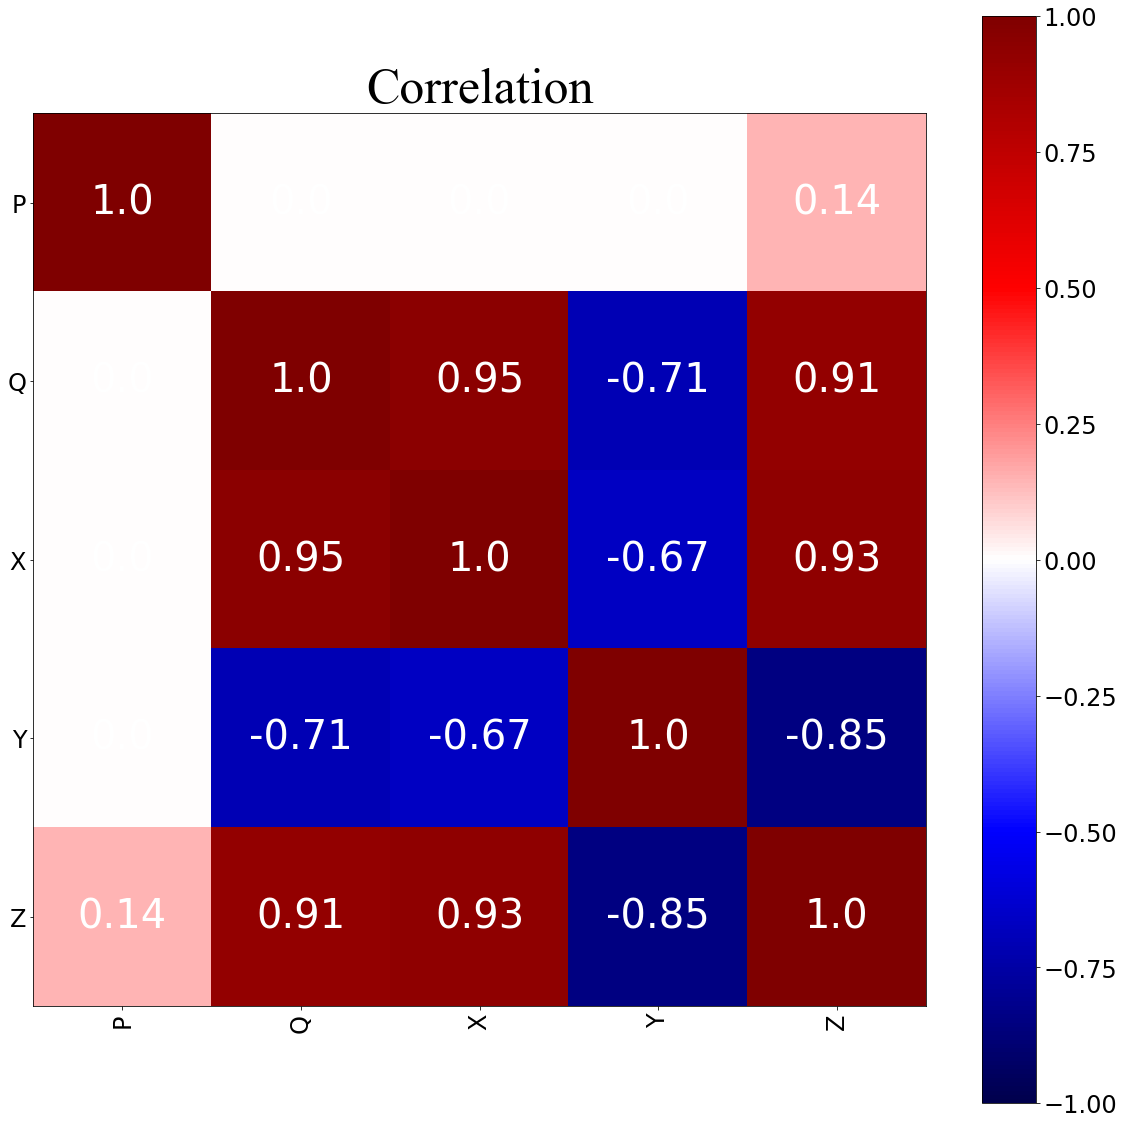

In [10]:
from datlib.plots import *
corr_matrix_heatmap(df.corr(),
                   save_fig = False,
                   pp = None,
                   title = "Correlation")


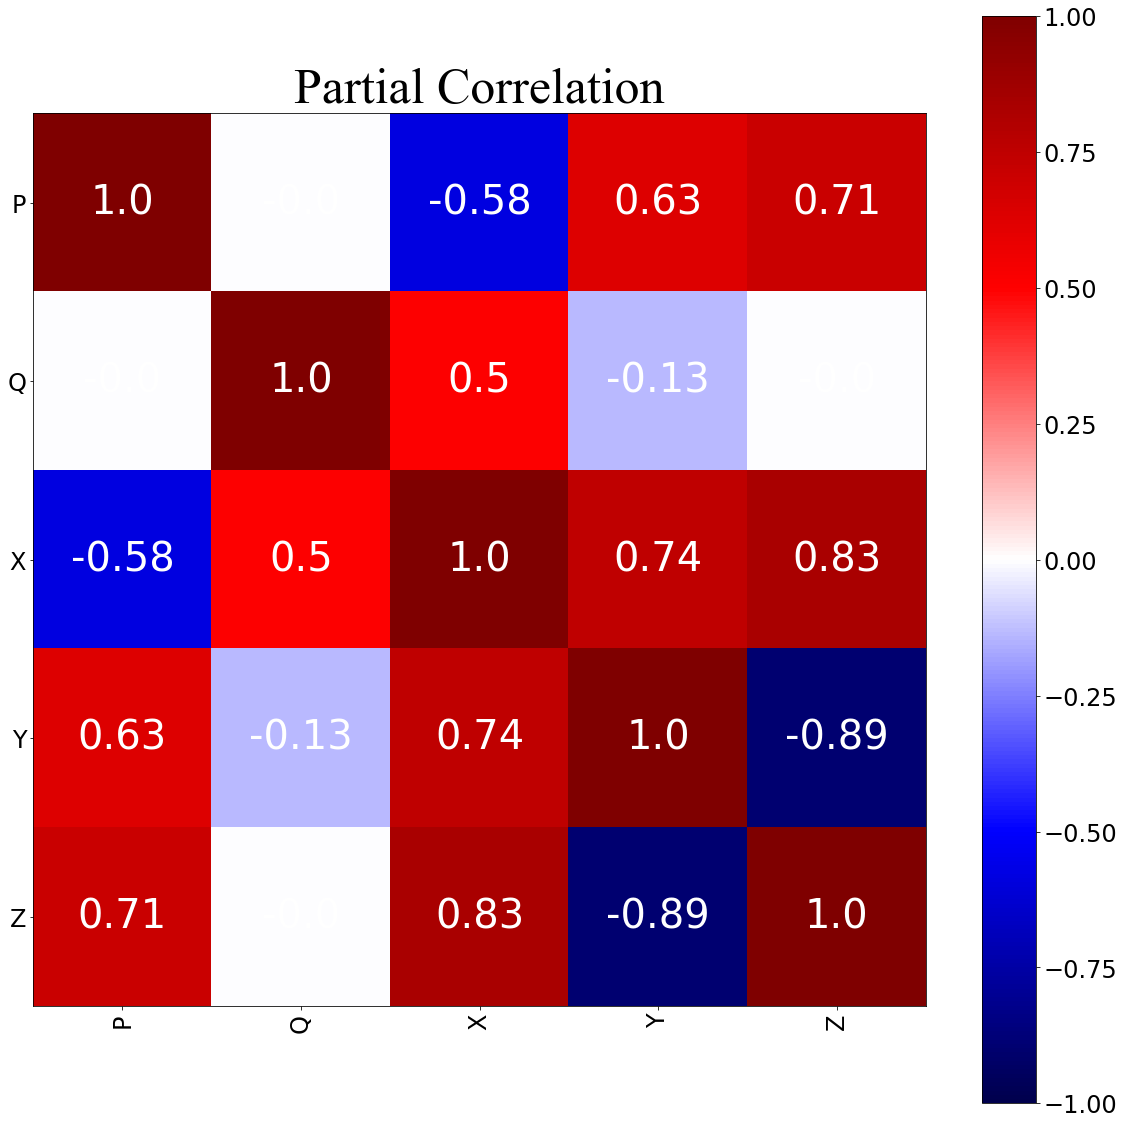

In [11]:
corr_matrix_heatmap(df.pcorr(),
                   save_fig = False,
                   pp = None,
                   title = "Partial Correlation")


In [12]:
pcorr_pvalues = {}

for y, Y in residuals.items():
    pcorr_pvalues[y] = {}
    for x, X in residuals.items():
        if x != y:
            # regress one residual on the other
            #  save the pvalue for the explanatory variable
            #  this is the pvalue of the partial correlation
            results = sm.OLS(Y, X).fit()
            pcorr_pvalues[y][x] = results.pvalues[x]
            print(results.summary())
        else:
            pcorr_pvalues[y][x] = np.NaN
            
pd.DataFrame(pcorr_pvalues).round(2)

                                 OLS Regression Results                                
Dep. Variable:                      P   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.000
Method:                 Least Squares   F-statistic:                             0.6196
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                       0.431
Time:                        09:23:16   Log-Likelihood:                     -1.9943e+05
No. Observations:              100000   AIC:                                  3.989e+05
Df Residuals:                   99999   BIC:                                  3.989e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

P     Q    X    Y     Z
P   NaN  0.43  0.0  0.0  0.00
Q  0.43   NaN  0.0  0.0  0.93
X  0.00  0.00  NaN  0.0  0.00
Y  0.00  0.00  0.0  NaN  0.00
Z  0.00  0.93  0.0  0.0   NaN

In [13]:
undirected_graph = {key:[] for key in df.keys()}
for x in undirected_graph:
    undirected_graph[x] = [y for y in df.keys() if y != x]
undirected_graph

{'P': ['Q', 'X', 'Y', 'Z'],
 'Q': ['P', 'X', 'Y', 'Z'],
 'X': ['P', 'Q', 'Y', 'Z'],
 'Y': ['P', 'Q', 'X', 'Z'],
 'Z': ['P', 'Q', 'X', 'Y']}

In [14]:
import copy
p_val = .01
def build_skeleton(df, undirected_graph):
    def check_remaining_controls(control_vars, undirected_graph, x, y, controls_used) :
        for c_var in control_vars:
            # set c_used every time use cycle through a new control
            #  the program will then iterate through remaining controls
            #  until statistical significance is broken
            c_used = copy.copy(controls_used)
            if y in undirected_graph[x]:
                c_used.append(c_var)
                print(x,y, controls_used)
                test = df.partial_corr(x = x, y = y, covar=c_used,
                                      method = "pearson")
                if test["p-val"].values[0] > p_val: 

                    undirected_graph[x].remove(y)
                    break
                else:
                    remaining_controls = copy.copy(control_vars)
                    remaining_controls.remove(c_var)

                    # recursive function that iterates through remaining variables 
                    #  uses them as controls statistical significance holds without them,
                    #  otherwise break
                    check_remaining_controls(remaining_controls, undirected_graph, x, y, c_used)

    for x in df.keys():
        ys = undirected_graph[x]
        for y in df.keys():
            if x != y:
                test = df.partial_corr(x=x, 
                                       y=y, 
                                       covar = None,
                                      method = "pearson")
                if test["p-val"].values[0] > p_val:
                    undirected_graph[x].remove(y)
                else:
                    control_vars = [z for z in df.keys() if z != y and z != x]
                    check_remaining_controls(control_vars, undirected_graph, x, y, [])
    return undirected_graph

build_skeleton(df, undirected_graph)

P Z []
P Z ['Q']
P Z ['Q', 'X']
P Z ['Q']
P Z ['Q', 'Y']
P Z []
P Z ['X']
P Z ['X', 'Q']
P Z ['X']
P Z ['X', 'Y']
P Z []
P Z ['Y']
P Z ['Y', 'Q']
P Z ['Y']
P Z ['Y', 'X']
Q X []
Q X ['P']
Q X ['P', 'Y']
Q X ['P']
Q X ['P', 'Z']
Q X []
Q X ['Y']
Q X ['Y', 'P']
Q X ['Y']
Q X ['Y', 'Z']
Q X []
Q X ['Z']
Q X ['Z', 'P']
Q X ['Z']
Q X ['Z', 'Y']
Q Y []
Q Y ['P']
Q Y ['P', 'X']
Q Y ['P']
Q Y ['P', 'Z']
Q Y []
Q Y ['X']
Q Y ['X', 'P']
Q Y ['X']
Q Y ['X', 'Z']
Q Y []
Q Y ['Z']
Q Y ['Z', 'P']
Q Y ['Z']
Q Y ['Z', 'X']
Q Z []
Q Z ['P']
Q Z ['P', 'X']
X Q []
X Q ['P']
X Q ['P', 'Y']
X Q ['P']
X Q ['P', 'Z']
X Q []
X Q ['Y']
X Q ['Y', 'P']
X Q ['Y']
X Q ['Y', 'Z']
X Q []
X Q ['Z']
X Q ['Z', 'P']
X Q ['Z']
X Q ['Z', 'Y']
X Y []
X Y ['P']
X Z []
X Z ['P']
X Z ['P', 'Q']
X Z ['P']
X Z ['P', 'Y']
X Z []
X Z ['Q']
X Z ['Q', 'P']
X Z ['Q']
X Z ['Q', 'Y']
X Z []
X Z ['Y']
X Z ['Y', 'P']
X Z ['Y']
X Z ['Y', 'Q']
Y Q []
Y Q ['P']
Y Q ['P', 'X']
Y Q ['P']
Y Q ['P', 'Z']
Y Q []
Y Q ['X']
Y Q ['X', 'P']
Y Q ['X

{'P': ['Z'],
 'Q': ['X', 'Y'],
 'X': ['Q', 'Z'],
 'Y': ['Q', 'Z'],
 'Z': ['P', 'X', 'Y']}

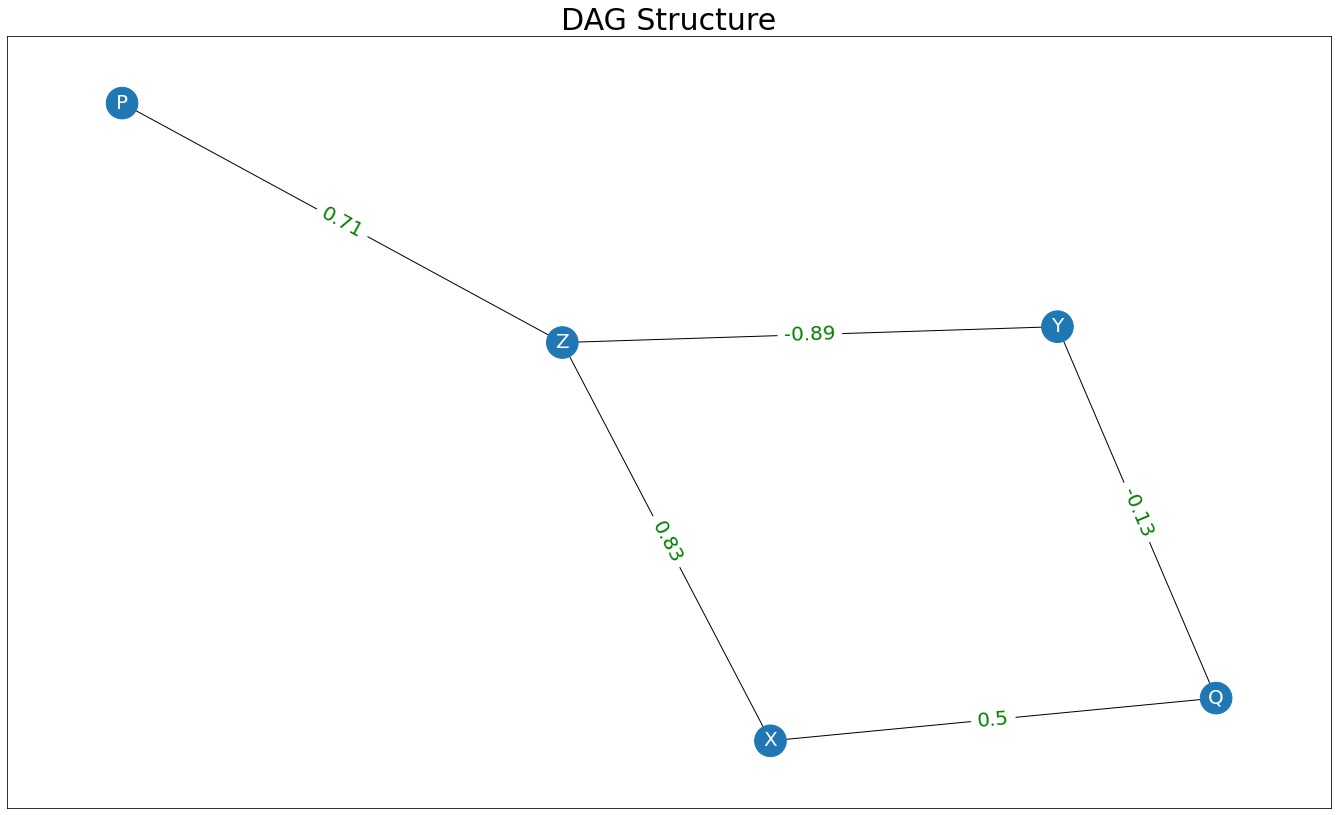

In [15]:
import matplotlib.pyplot as plt
import networkx as nx

def graph_DAG(undirected_graph, df, title = "DAG Structure"):
    pcorr_matrix = df.pcorr()
    graph= nx.Graph()
    edges = []
    edge_labels = {}
    for key in undirected_graph:
        for key2 in undirected_graph[key]:
            if (key2, key) not in edges:
                edge = (key, key2)
                edges.append(edge)
                edge_labels[edge] = str(round(pcorr_matrix.loc[key][key2], 2))
    
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]
    
    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)
    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, 
                     pos, 
                     node_color = color_map,
                     node_size=1000,
                    # show node label
                     with_labels = True,
                     arrows = False,
                     font_size = 20,
                     alpha = 1,
                     font_color = "white",
                     ax = ax)
    nx.draw_networkx_edge_labels(graph,
                                 pos,
                                edge_labels = edge_labels,
                                 font_color = "green",
                                 font_size=20)    
    
    plt.show()
    
graph_DAG(undirected_graph, df)

In [16]:
from pgmpy.estimators import PC
c= PC(df)
max_cond_vars = len(df.keys()) - 2
model = c.estimate(return_type = "dag",
                  variant = "parallel", #"orig", "stable"
                  significance = p_val,
                  max_cond_vars = max_cond_vars,
                  ci_test = "pearsonr")
edges = model.edges()
edges

  0%|          | 0/3 [00:00<?, ?it/s]

OutEdgeView([('Y', 'Z'), ('P', 'Z'), ('X', 'Z'), ('Q', 'Y'), ('Q', 'X')])

keep control: P
keep control: X
('Y', 'Z') ['P', 'X']
keep control: X
keep control: Y
('P', 'Z') ['X', 'Y']
keep control: P
keep control: Y
('X', 'Z') ['P', 'Y']
('Q', 'Y') []
('Q', 'X') []


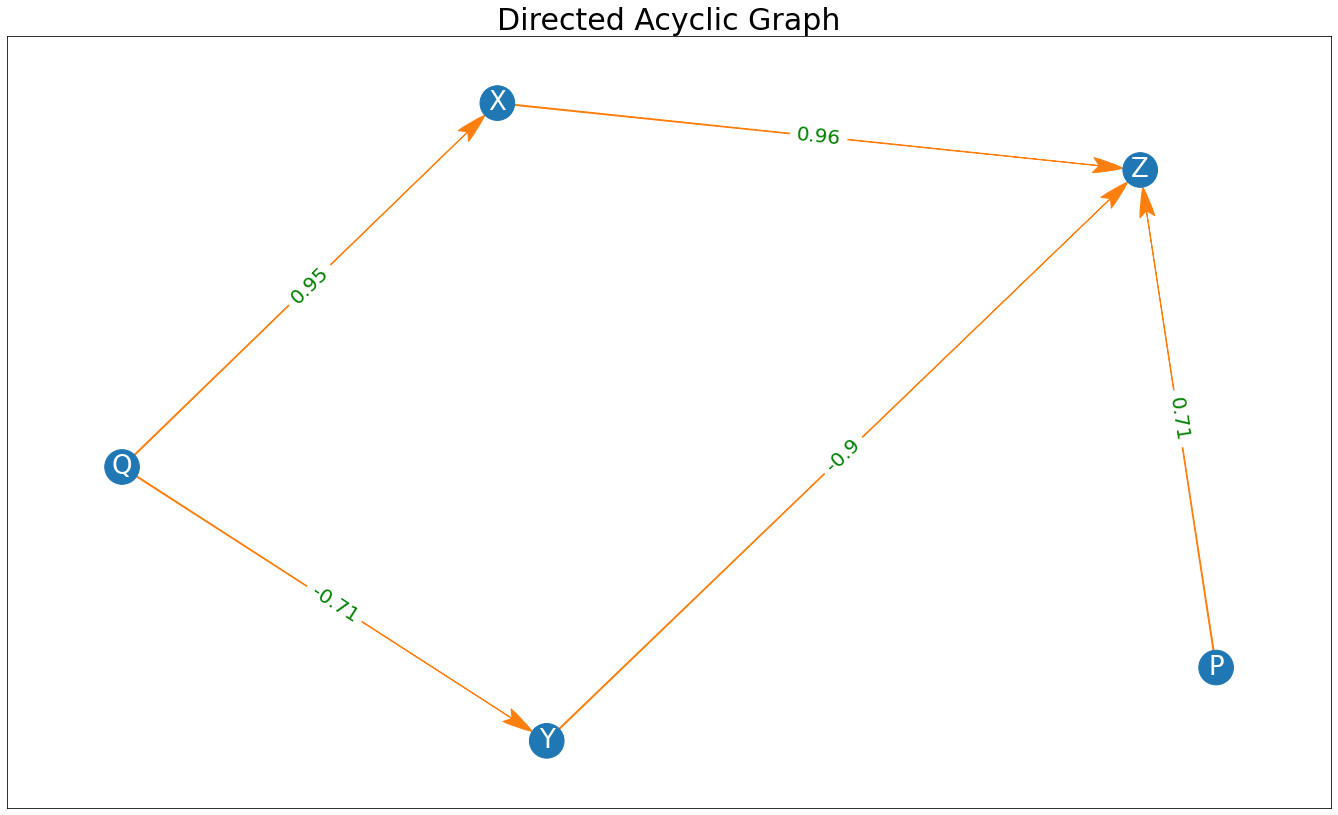

In [17]:
from matplotlib.patches import ArrowStyle

def graph_DAG(edges, df, title=""):
    graph = nx.DiGraph()
    
    edge_labels = {}
    for edge in edges:
        controls = [key for key in df.keys() if key not in edge]
        control = list(set(controls))
        keep_controls = []
        for control in controls:
            control_edges = [ctrl_edge for ctrl_edge in edges if control == ctrl_edge[0]]
            if (control, edge[1]) in control_edges:
                print("keep control:", control)
                keep_controls.append(control)
        print(edge, keep_controls)
        # build pcorr matrix with nodes from the edge + controls
        pcorr = df[[edge[0], edge[1]]+keep_controls].pcorr().round(2)
        edge_labels[edge] = str(pcorr.loc[edge[1], edge[0]])
    
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]
    
    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)
    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph,
                    pos,
                    node_color = color_map,
                    node_size = 1200,
                    font_color = "white",
                    font_size = 26,
                    alpha = 1,
                    width = 1,
                    edge_color = "C1",
                    arrowstyle = ArrowStyle("Fancy, head_length=3, head_width=1.5, tail_width = .1"))
    
    nx.draw_networkx_edge_labels(graph,
                                pos,
                                edge_labels = edge_labels,
                                font_color = "green",
                                font_size = 20)
    
    plt.show()
graph_DAG(edges, df, title = "Directed Acyclic Graph")


In [75]:
import pandas as pd
import numpy as np
economic_data = pd.read_excel("efw-2021-master-index-data-for-researchers.xlsx",
                              index_col = [1,0],
                              header = [0],
                              sheet_name = "EFW Panel Data 2021 Report")
economic_data.dropna(how = "all", axis = 1, inplace = True)
xlsx = pd.ExcelFile("mpd2020.xlsx")
gdp_data = pd.read_excel(xlsx, "Full data", index_col = [0,1], header = [0])
economic_data["RGDP per capita"] = economic_data.index.map(gdp_data["RGDP per capita"])
economic_data = economic_data.sort_values(["ISO", "Year"], ascending = (True, True))
economic_data = economic_data.drop(["Countries"], axis = 1).dropna(how = "any", axis = 0)

# difference RGDP per capita once
economic_data["RGDP per capita"] = economic_data["RGDP per capita"].groupby(level=0).diff(1)
economic_data.dropna(inplace = True)
economic_data

ISO_Code   Summary  Size of Government  \
ISO Year                                           
AGO 2006      24.0  4.790745            5.633145   
    2007      24.0  4.854972            5.520344   
    2008      24.0  4.877331            5.371626   
    2009      24.0  5.319136            7.454668   
    2010      24.0  5.386032            6.308737   
...            ...       ...                 ...   
ZWE 2014     716.0  5.898573            6.773982   
    2015     716.0  6.339343            6.967275   
    2016     716.0  5.815715            5.332185   
    2017     716.0  5.191592            4.698293   
    2018     716.0  5.310210            4.378478   

          Legal System & Property Rights  Sound Money  \
ISO Year                                                
AGO 2006                        3.237054     4.061198   
    2007                        3.223210     4.453327   
    2008                        3.381772     5.032836   
    2009                        3.393677     5.238259   
    2010                        3.573554     5.570226   
...                                  ...          ...   
ZWE 2014                        3.930055     7.966798   
    2015                        4.108502     8.180178   
    2016                        4.056637     7.378648   
    2017                        4.071713     6.719400   
    2018                        4.042090     6.044910   

          Freedom to trade internationally  Regulation  RGDP per capita  
ISO Year                                                                 
AGO 2006                          5.811252    5.211075         883.5667  
    2007                          5.632128    5.445851        1181.2110  
    2008                          5.379912    5.220508         970.1999  
    2009                          5.503781    5.005297         343.8559  
    2010                          5.756330    5.721314         433.0617  
...                                    ...         ...              ...  
ZWE 2014                          5.783920    5.038112         -10.0000  
    2015                          5.884012    6.556751         -34.0000  
    2016                          5.789575    6.521529         -26.0000  
    2017                          4.068273    6.400282          48.3662  
    2018                          5.782070    6.303501          29.0390  

[2999 rows x 8 columns]

In [76]:
countries = list(economic_data.groupby("ISO").mean().index)
for country in countries:
    economic_data[country]= 0
    economic_data[country].loc[country]=1
dep_vars = list(economic_data)[2:8]

C:\Users\JLCat\AppData\Local\Temp\ipykernel_15384\3763759950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economic_data[country].loc[country]=1
C:\Users\JLCat\AppData\Local\Temp\ipykernel_15384\3763759950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economic_data[country].loc[country]=1
C:\Users\JLCat\AppData\Local\Temp\ipykernel_15384\3763759950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economic_data[country].l

C:\Users\JLCat\AppData\Local\Temp\ipykernel_15384\3763759950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economic_data[country].loc[country]=1
C:\Users\JLCat\AppData\Local\Temp\ipykernel_15384\3763759950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economic_data[country].loc[country]=1
C:\Users\JLCat\AppData\Local\Temp\ipykernel_15384\3763759950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economic_data[country].l

C:\Users\JLCat\AppData\Local\Temp\ipykernel_15384\3763759950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economic_data[country].loc[country]=1
C:\Users\JLCat\AppData\Local\Temp\ipykernel_15384\3763759950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economic_data[country].loc[country]=1
C:\Users\JLCat\AppData\Local\Temp\ipykernel_15384\3763759950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economic_data[country].l

C:\Users\JLCat\AppData\Local\Temp\ipykernel_15384\3763759950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economic_data[country].loc[country]=1
C:\Users\JLCat\AppData\Local\Temp\ipykernel_15384\3763759950.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  economic_data[country]= 0
C:\Users\JLCat\AppData\Local\Temp\ipykernel_15384\3763759950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

C:\Users\JLCat\AppData\Local\Temp\ipykernel_15384\3763759950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economic_data[country].loc[country]=1
C:\Users\JLCat\AppData\Local\Temp\ipykernel_15384\3763759950.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  economic_data[country]= 0
C:\Users\JLCat\AppData\Local\Temp\ipykernel_15384\3763759950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

C:\Users\JLCat\AppData\Local\Temp\ipykernel_15384\3763759950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economic_data[country].loc[country]=1
C:\Users\JLCat\AppData\Local\Temp\ipykernel_15384\3763759950.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  economic_data[country]= 0
C:\Users\JLCat\AppData\Local\Temp\ipykernel_15384\3763759950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

In [78]:
# from pgmpy.independencies import Independencies
# independencies = Independencies()

# for country in countries:
#     ind = [c for c in countries if c != country]
#     independencies.add_assertions([country, ind])
# independencies

['Size of Government',
 'Legal System & Property Rights',
 'Sound Money',
 'Freedom to trade internationally',
 'Regulation',
 'RGDP per capita']

In [79]:
# example for developing residuals using entityt fixed effects
import statsmodels.api as sm
df = economic_data.copy()
residuals = {}
for y_var in dep_vars:
    X_vars = copy.copy(dep_vars) + countries
    X_vars.remove(y_var)
    X = df[X_vars]
    X["Constant"] = 1
    y = df[[y_var]]
    model = sm.OLS(y, X)
    results = model.fit()
    residuals[y_var] = results.resid
residuals = pd.DataFrame(residuals)
residuals

C:\Users\JLCat\AppData\Local\Temp\ipykernel_15384\528056163.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
C:\Users\JLCat\AppData\Local\Temp\ipykernel_15384\528056163.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
C:\Users\JLCat\AppData\Local\Temp\ipykernel_15384\528056163.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

Size of Government  Legal System & Property Rights  Sound Money  \
ISO Year                                                                    
AGO 2006           -0.879952                       -0.048178    -1.704855   
    2007           -1.018025                       -0.106347    -1.363874   
    2008           -1.083031                        0.075406    -0.582558   
    2009            1.022172                        0.037279    -0.456869   
    2010           -0.364633                        0.101480    -0.667021   
...                      ...                             ...          ...   
ZWE 2014            0.249356                       -0.395562     3.358150   
    2015            0.060134                       -0.492481     2.495385   
    2016           -1.521361                       -0.440659     1.888030   
    2017           -1.724780                       -0.253804     2.091448   
    2018           -2.389514                       -0.317563     0.766996   

          Freedom to trade internationally  Regulation  RGDP per capita  
ISO Year                                                                 
AGO 2006                          1.457620    0.253416       457.565001  
    2007                          1.136818    0.477968       840.878910  
    2008                          0.825159    0.165409       652.892142  
    2009                          0.204587   -0.432811      -137.675764  
    2010                          0.536229    0.327019       162.619640  
...                                    ...         ...              ...  
ZWE 2014                          0.282369   -0.858211       -31.944402  
    2015                         -0.241526    0.536978       254.988314  
    2016                          0.508928    0.899562       323.020952  
    2017                         -0.769836    1.185045       562.212299  
    2018                          1.279888    1.041554       337.620455  

[2999 rows x 6 columns]

In [80]:
def gen_error_terms(df, endog, entities):
    residuals = {}
    for y_var in endog:
        X_vars = list(endog) + entities
        X_vars.remove(y_var)
        X = df[X_vars]
        X["Constant"] = 1
        y = df[[y_var]]
        residuals[y_var] = sm.OLS(y, X).fit().resid    
    return pd.DataFrame(residuals)



def map_residuals(df, dep_vars, entities):
    def check_remaining_controls(control_vars, residuals, x, y, controls_used) :
        for c_var in control_vars:
            # set c_used every time use cycle through a new control
            #  the program will then iterate through remaining controls
            #  until statistical significance is broken
            c_used = copy.copy(controls_used)
#             if y in residuals[x]:
            c_used.append(c_var)
            print(x,y, controls_used)
            residuals[tuple(i for i in c_used)] = gen_error_terms(df, dep_vars, entities)
            remaining_controls = copy.copy(control_vars)
            remaining_controls.remove(c_var)

            # recursive function that iterates through remaining variables 
            #  uses them as controls statistical significance holds without them,
            #  otherwise break
            check_remaining_controls(remaining_controls, residuals, x, y, c_used)
    residuals = {}
    
    for x in dep_vars:
#         ys = undirected_graph[x]
        for y in dep_vars:
            if x != y:
                residuals[x,y] = {}
                residuals[x,y][None] = gen_error_terms(df, dep_vars, entities)
                control_vars = [z for z in dep_vars if z != y and z != x]
                check_remaining_controls(control_vars, residuals[x,y], x, y, [])        

    return residuals

# build fully connected graph to pass to build_skeleton()


residuals = map_residuals(economic_data[dep_vars + countries], 
                          dep_vars, 
                          countries)
residuals

Size of Government Legal System & Property Rights []
Size of Government Legal System & Property Rights ['Sound Money']
Size of Government Legal System & Property Rights ['Sound Money', 'Freedom to trade internationally']
Size of Government Legal System & Property Rights ['Sound Money', 'Freedom to trade internationally', 'Regulation']
Size of Government Legal System & Property Rights ['Sound Money', 'Freedom to trade internationally']
Size of Government Legal System & Property Rights ['Sound Money', 'Freedom to trade internationally', 'RGDP per capita']
Size of Government Legal System & Property Rights ['Sound Money']
Size of Government Legal System & Property Rights ['Sound Money', 'Regulation']
Size of Government Legal System & Property Rights ['Sound Money', 'Regulation', 'Freedom to trade internationally']
Size of Government Legal System & Property Rights ['Sound Money', 'Regulation']
Size of Government Legal System & Property Rights ['Sound Money', 'Regulation', 'RGDP per capita']

Size of Government Sound Money ['Freedom to trade internationally', 'Regulation', 'RGDP per capita']
Size of Government Sound Money ['Freedom to trade internationally']
Size of Government Sound Money ['Freedom to trade internationally', 'RGDP per capita']
Size of Government Sound Money ['Freedom to trade internationally', 'RGDP per capita', 'Legal System & Property Rights']
Size of Government Sound Money ['Freedom to trade internationally', 'RGDP per capita']
Size of Government Sound Money ['Freedom to trade internationally', 'RGDP per capita', 'Regulation']
Size of Government Sound Money []
Size of Government Sound Money ['Regulation']
Size of Government Sound Money ['Regulation', 'Legal System & Property Rights']
Size of Government Sound Money ['Regulation', 'Legal System & Property Rights', 'Freedom to trade internationally']
Size of Government Sound Money ['Regulation', 'Legal System & Property Rights']
Size of Government Sound Money ['Regulation', 'Legal System & Property Rights',

Size of Government Freedom to trade internationally ['RGDP per capita']
Size of Government Freedom to trade internationally ['RGDP per capita', 'Sound Money']
Size of Government Freedom to trade internationally ['RGDP per capita', 'Sound Money', 'Legal System & Property Rights']
Size of Government Freedom to trade internationally ['RGDP per capita', 'Sound Money']
Size of Government Freedom to trade internationally ['RGDP per capita', 'Sound Money', 'Regulation']
Size of Government Freedom to trade internationally ['RGDP per capita']
Size of Government Freedom to trade internationally ['RGDP per capita', 'Regulation']
Size of Government Freedom to trade internationally ['RGDP per capita', 'Regulation', 'Legal System & Property Rights']
Size of Government Freedom to trade internationally ['RGDP per capita', 'Regulation']
Size of Government Freedom to trade internationally ['RGDP per capita', 'Regulation', 'Sound Money']
Size of Government Regulation []
Size of Government Regulation ['Le

Size of Government RGDP per capita ['Sound Money']
Size of Government RGDP per capita ['Sound Money', 'Freedom to trade internationally']
Size of Government RGDP per capita ['Sound Money', 'Freedom to trade internationally', 'Legal System & Property Rights']
Size of Government RGDP per capita ['Sound Money', 'Freedom to trade internationally']
Size of Government RGDP per capita ['Sound Money', 'Freedom to trade internationally', 'Regulation']
Size of Government RGDP per capita ['Sound Money']
Size of Government RGDP per capita ['Sound Money', 'Regulation']
Size of Government RGDP per capita ['Sound Money', 'Regulation', 'Legal System & Property Rights']
Size of Government RGDP per capita ['Sound Money', 'Regulation']
Size of Government RGDP per capita ['Sound Money', 'Regulation', 'Freedom to trade internationally']
Size of Government RGDP per capita []
Size of Government RGDP per capita ['Freedom to trade internationally']
Size of Government RGDP per capita ['Freedom to trade internat

Legal System & Property Rights Size of Government ['RGDP per capita', 'Sound Money']
Legal System & Property Rights Size of Government ['RGDP per capita', 'Sound Money', 'Freedom to trade internationally']
Legal System & Property Rights Size of Government ['RGDP per capita', 'Sound Money']
Legal System & Property Rights Size of Government ['RGDP per capita', 'Sound Money', 'Regulation']
Legal System & Property Rights Size of Government ['RGDP per capita']
Legal System & Property Rights Size of Government ['RGDP per capita', 'Freedom to trade internationally']
Legal System & Property Rights Size of Government ['RGDP per capita', 'Freedom to trade internationally', 'Sound Money']
Legal System & Property Rights Size of Government ['RGDP per capita', 'Freedom to trade internationally']
Legal System & Property Rights Size of Government ['RGDP per capita', 'Freedom to trade internationally', 'Regulation']
Legal System & Property Rights Size of Government ['RGDP per capita']
Legal System & Pr

Legal System & Property Rights Freedom to trade internationally ['Size of Government', 'Regulation', 'RGDP per capita']
Legal System & Property Rights Freedom to trade internationally ['Size of Government']
Legal System & Property Rights Freedom to trade internationally ['Size of Government', 'RGDP per capita']
Legal System & Property Rights Freedom to trade internationally ['Size of Government', 'RGDP per capita', 'Sound Money']
Legal System & Property Rights Freedom to trade internationally ['Size of Government', 'RGDP per capita']
Legal System & Property Rights Freedom to trade internationally ['Size of Government', 'RGDP per capita', 'Regulation']
Legal System & Property Rights Freedom to trade internationally []
Legal System & Property Rights Freedom to trade internationally ['Sound Money']
Legal System & Property Rights Freedom to trade internationally ['Sound Money', 'Size of Government']
Legal System & Property Rights Freedom to trade internationally ['Sound Money', 'Size of Go

Legal System & Property Rights Regulation []
Legal System & Property Rights Regulation ['Freedom to trade internationally']
Legal System & Property Rights Regulation ['Freedom to trade internationally', 'Size of Government']
Legal System & Property Rights Regulation ['Freedom to trade internationally', 'Size of Government', 'Sound Money']
Legal System & Property Rights Regulation ['Freedom to trade internationally', 'Size of Government']
Legal System & Property Rights Regulation ['Freedom to trade internationally', 'Size of Government', 'RGDP per capita']
Legal System & Property Rights Regulation ['Freedom to trade internationally']
Legal System & Property Rights Regulation ['Freedom to trade internationally', 'Sound Money']
Legal System & Property Rights Regulation ['Freedom to trade internationally', 'Sound Money', 'Size of Government']
Legal System & Property Rights Regulation ['Freedom to trade internationally', 'Sound Money']
Legal System & Property Rights Regulation ['Freedom to 

Legal System & Property Rights RGDP per capita ['Regulation', 'Sound Money', 'Freedom to trade internationally']
Legal System & Property Rights RGDP per capita ['Regulation']
Legal System & Property Rights RGDP per capita ['Regulation', 'Freedom to trade internationally']
Legal System & Property Rights RGDP per capita ['Regulation', 'Freedom to trade internationally', 'Size of Government']
Legal System & Property Rights RGDP per capita ['Regulation', 'Freedom to trade internationally']
Legal System & Property Rights RGDP per capita ['Regulation', 'Freedom to trade internationally', 'Sound Money']
Sound Money Size of Government []
Sound Money Size of Government ['Legal System & Property Rights']
Sound Money Size of Government ['Legal System & Property Rights', 'Freedom to trade internationally']
Sound Money Size of Government ['Legal System & Property Rights', 'Freedom to trade internationally', 'Regulation']
Sound Money Size of Government ['Legal System & Property Rights', 'Freedom to 

Sound Money Legal System & Property Rights ['Freedom to trade internationally', 'Regulation', 'Size of Government']
Sound Money Legal System & Property Rights ['Freedom to trade internationally', 'Regulation']
Sound Money Legal System & Property Rights ['Freedom to trade internationally', 'Regulation', 'RGDP per capita']
Sound Money Legal System & Property Rights ['Freedom to trade internationally']
Sound Money Legal System & Property Rights ['Freedom to trade internationally', 'RGDP per capita']
Sound Money Legal System & Property Rights ['Freedom to trade internationally', 'RGDP per capita', 'Size of Government']
Sound Money Legal System & Property Rights ['Freedom to trade internationally', 'RGDP per capita']
Sound Money Legal System & Property Rights ['Freedom to trade internationally', 'RGDP per capita', 'Regulation']
Sound Money Legal System & Property Rights []
Sound Money Legal System & Property Rights ['Regulation']
Sound Money Legal System & Property Rights ['Regulation', 'Si

Sound Money Freedom to trade internationally ['RGDP per capita', 'Size of Government']
Sound Money Freedom to trade internationally ['RGDP per capita', 'Size of Government', 'Legal System & Property Rights']
Sound Money Freedom to trade internationally ['RGDP per capita', 'Size of Government']
Sound Money Freedom to trade internationally ['RGDP per capita', 'Size of Government', 'Regulation']
Sound Money Freedom to trade internationally ['RGDP per capita']
Sound Money Freedom to trade internationally ['RGDP per capita', 'Legal System & Property Rights']
Sound Money Freedom to trade internationally ['RGDP per capita', 'Legal System & Property Rights', 'Size of Government']
Sound Money Freedom to trade internationally ['RGDP per capita', 'Legal System & Property Rights']
Sound Money Freedom to trade internationally ['RGDP per capita', 'Legal System & Property Rights', 'Regulation']
Sound Money Freedom to trade internationally ['RGDP per capita']
Sound Money Freedom to trade international

Sound Money RGDP per capita ['Legal System & Property Rights']
Sound Money RGDP per capita ['Legal System & Property Rights', 'Freedom to trade internationally']
Sound Money RGDP per capita ['Legal System & Property Rights', 'Freedom to trade internationally', 'Size of Government']
Sound Money RGDP per capita ['Legal System & Property Rights', 'Freedom to trade internationally']
Sound Money RGDP per capita ['Legal System & Property Rights', 'Freedom to trade internationally', 'Regulation']
Sound Money RGDP per capita ['Legal System & Property Rights']
Sound Money RGDP per capita ['Legal System & Property Rights', 'Regulation']
Sound Money RGDP per capita ['Legal System & Property Rights', 'Regulation', 'Size of Government']
Sound Money RGDP per capita ['Legal System & Property Rights', 'Regulation']
Sound Money RGDP per capita ['Legal System & Property Rights', 'Regulation', 'Freedom to trade internationally']
Sound Money RGDP per capita []
Sound Money RGDP per capita ['Freedom to trad

Freedom to trade internationally Size of Government ['RGDP per capita', 'Legal System & Property Rights']
Freedom to trade internationally Size of Government ['RGDP per capita', 'Legal System & Property Rights', 'Sound Money']
Freedom to trade internationally Size of Government ['RGDP per capita', 'Legal System & Property Rights']
Freedom to trade internationally Size of Government ['RGDP per capita', 'Legal System & Property Rights', 'Regulation']
Freedom to trade internationally Size of Government ['RGDP per capita']
Freedom to trade internationally Size of Government ['RGDP per capita', 'Sound Money']
Freedom to trade internationally Size of Government ['RGDP per capita', 'Sound Money', 'Legal System & Property Rights']
Freedom to trade internationally Size of Government ['RGDP per capita', 'Sound Money']
Freedom to trade internationally Size of Government ['RGDP per capita', 'Sound Money', 'Regulation']
Freedom to trade internationally Size of Government ['RGDP per capita']
Freedom

Freedom to trade internationally Sound Money ['Size of Government', 'Legal System & Property Rights']
Freedom to trade internationally Sound Money ['Size of Government', 'Legal System & Property Rights', 'RGDP per capita']
Freedom to trade internationally Sound Money ['Size of Government']
Freedom to trade internationally Sound Money ['Size of Government', 'Regulation']
Freedom to trade internationally Sound Money ['Size of Government', 'Regulation', 'Legal System & Property Rights']
Freedom to trade internationally Sound Money ['Size of Government', 'Regulation']
Freedom to trade internationally Sound Money ['Size of Government', 'Regulation', 'RGDP per capita']
Freedom to trade internationally Sound Money ['Size of Government']
Freedom to trade internationally Sound Money ['Size of Government', 'RGDP per capita']
Freedom to trade internationally Sound Money ['Size of Government', 'RGDP per capita', 'Legal System & Property Rights']
Freedom to trade internationally Sound Money ['Size 

Freedom to trade internationally Regulation ['Legal System & Property Rights', 'RGDP per capita']
Freedom to trade internationally Regulation ['Legal System & Property Rights', 'RGDP per capita', 'Sound Money']
Freedom to trade internationally Regulation []
Freedom to trade internationally Regulation ['Sound Money']
Freedom to trade internationally Regulation ['Sound Money', 'Size of Government']
Freedom to trade internationally Regulation ['Sound Money', 'Size of Government', 'Legal System & Property Rights']
Freedom to trade internationally Regulation ['Sound Money', 'Size of Government']
Freedom to trade internationally Regulation ['Sound Money', 'Size of Government', 'RGDP per capita']
Freedom to trade internationally Regulation ['Sound Money']
Freedom to trade internationally Regulation ['Sound Money', 'Legal System & Property Rights']
Freedom to trade internationally Regulation ['Sound Money', 'Legal System & Property Rights', 'Size of Government']
Freedom to trade internationall

Freedom to trade internationally RGDP per capita ['Regulation', 'Legal System & Property Rights', 'Size of Government']
Freedom to trade internationally RGDP per capita ['Regulation', 'Legal System & Property Rights']
Freedom to trade internationally RGDP per capita ['Regulation', 'Legal System & Property Rights', 'Sound Money']
Freedom to trade internationally RGDP per capita ['Regulation']
Freedom to trade internationally RGDP per capita ['Regulation', 'Sound Money']
Freedom to trade internationally RGDP per capita ['Regulation', 'Sound Money', 'Size of Government']
Freedom to trade internationally RGDP per capita ['Regulation', 'Sound Money']
Freedom to trade internationally RGDP per capita ['Regulation', 'Sound Money', 'Legal System & Property Rights']
Regulation Size of Government []
Regulation Size of Government ['Legal System & Property Rights']
Regulation Size of Government ['Legal System & Property Rights', 'Sound Money']
Regulation Size of Government ['Legal System & Property

Regulation Legal System & Property Rights ['Sound Money', 'Freedom to trade internationally', 'Size of Government']
Regulation Legal System & Property Rights ['Sound Money', 'Freedom to trade internationally']
Regulation Legal System & Property Rights ['Sound Money', 'Freedom to trade internationally', 'RGDP per capita']
Regulation Legal System & Property Rights ['Sound Money']
Regulation Legal System & Property Rights ['Sound Money', 'RGDP per capita']
Regulation Legal System & Property Rights ['Sound Money', 'RGDP per capita', 'Size of Government']
Regulation Legal System & Property Rights ['Sound Money', 'RGDP per capita']
Regulation Legal System & Property Rights ['Sound Money', 'RGDP per capita', 'Freedom to trade internationally']
Regulation Legal System & Property Rights []
Regulation Legal System & Property Rights ['Freedom to trade internationally']
Regulation Legal System & Property Rights ['Freedom to trade internationally', 'Size of Government']
Regulation Legal System & Pr

Regulation Sound Money ['RGDP per capita', 'Legal System & Property Rights', 'Size of Government']
Regulation Sound Money ['RGDP per capita', 'Legal System & Property Rights']
Regulation Sound Money ['RGDP per capita', 'Legal System & Property Rights', 'Freedom to trade internationally']
Regulation Sound Money ['RGDP per capita']
Regulation Sound Money ['RGDP per capita', 'Freedom to trade internationally']
Regulation Sound Money ['RGDP per capita', 'Freedom to trade internationally', 'Size of Government']
Regulation Sound Money ['RGDP per capita', 'Freedom to trade internationally']
Regulation Sound Money ['RGDP per capita', 'Freedom to trade internationally', 'Legal System & Property Rights']
Regulation Freedom to trade internationally []
Regulation Freedom to trade internationally ['Size of Government']
Regulation Freedom to trade internationally ['Size of Government', 'Legal System & Property Rights']
Regulation Freedom to trade internationally ['Size of Government', 'Legal System 

Regulation RGDP per capita ['Legal System & Property Rights']
Regulation RGDP per capita ['Legal System & Property Rights', 'Sound Money']
Regulation RGDP per capita ['Legal System & Property Rights', 'Sound Money', 'Size of Government']
Regulation RGDP per capita ['Legal System & Property Rights', 'Sound Money']
Regulation RGDP per capita ['Legal System & Property Rights', 'Sound Money', 'Freedom to trade internationally']
Regulation RGDP per capita ['Legal System & Property Rights']
Regulation RGDP per capita ['Legal System & Property Rights', 'Freedom to trade internationally']
Regulation RGDP per capita ['Legal System & Property Rights', 'Freedom to trade internationally', 'Size of Government']
Regulation RGDP per capita ['Legal System & Property Rights', 'Freedom to trade internationally']
Regulation RGDP per capita ['Legal System & Property Rights', 'Freedom to trade internationally', 'Sound Money']
Regulation RGDP per capita []
Regulation RGDP per capita ['Sound Money']
Regulati

RGDP per capita Size of Government ['Regulation']
RGDP per capita Size of Government ['Regulation', 'Sound Money']
RGDP per capita Size of Government ['Regulation', 'Sound Money', 'Legal System & Property Rights']
RGDP per capita Size of Government ['Regulation', 'Sound Money']
RGDP per capita Size of Government ['Regulation', 'Sound Money', 'Freedom to trade internationally']
RGDP per capita Size of Government ['Regulation']
RGDP per capita Size of Government ['Regulation', 'Freedom to trade internationally']
RGDP per capita Size of Government ['Regulation', 'Freedom to trade internationally', 'Legal System & Property Rights']
RGDP per capita Size of Government ['Regulation', 'Freedom to trade internationally']
RGDP per capita Size of Government ['Regulation', 'Freedom to trade internationally', 'Sound Money']
RGDP per capita Legal System & Property Rights []
RGDP per capita Legal System & Property Rights ['Size of Government']
RGDP per capita Legal System & Property Rights ['Size of 

RGDP per capita Sound Money ['Legal System & Property Rights', 'Size of Government']
RGDP per capita Sound Money ['Legal System & Property Rights', 'Size of Government', 'Regulation']
RGDP per capita Sound Money ['Legal System & Property Rights']
RGDP per capita Sound Money ['Legal System & Property Rights', 'Freedom to trade internationally']
RGDP per capita Sound Money ['Legal System & Property Rights', 'Freedom to trade internationally', 'Size of Government']
RGDP per capita Sound Money ['Legal System & Property Rights', 'Freedom to trade internationally']
RGDP per capita Sound Money ['Legal System & Property Rights', 'Freedom to trade internationally', 'Regulation']
RGDP per capita Sound Money ['Legal System & Property Rights']
RGDP per capita Sound Money ['Legal System & Property Rights', 'Regulation']
RGDP per capita Sound Money ['Legal System & Property Rights', 'Regulation', 'Size of Government']
RGDP per capita Sound Money ['Legal System & Property Rights', 'Regulation']
RGDP 

RGDP per capita Freedom to trade internationally []
RGDP per capita Freedom to trade internationally ['Regulation']
RGDP per capita Freedom to trade internationally ['Regulation', 'Size of Government']
RGDP per capita Freedom to trade internationally ['Regulation', 'Size of Government', 'Legal System & Property Rights']
RGDP per capita Freedom to trade internationally ['Regulation', 'Size of Government']
RGDP per capita Freedom to trade internationally ['Regulation', 'Size of Government', 'Sound Money']
RGDP per capita Freedom to trade internationally ['Regulation']
RGDP per capita Freedom to trade internationally ['Regulation', 'Legal System & Property Rights']
RGDP per capita Freedom to trade internationally ['Regulation', 'Legal System & Property Rights', 'Size of Government']
RGDP per capita Freedom to trade internationally ['Regulation', 'Legal System & Property Rights']
RGDP per capita Freedom to trade internationally ['Regulation', 'Legal System & Property Rights', 'Sound Money'

{('Size of Government',
  'Legal System & Property Rights'): {None:           Size of Government  Legal System & Property Rights  Sound Money  \
  ISO Year                                                                    
  AGO 2006           -0.879952                       -0.048178    -1.704855   
      2007           -1.018025                       -0.106347    -1.363874   
      2008           -1.083031                        0.075406    -0.582558   
      2009            1.022172                        0.037279    -0.456869   
      2010           -0.364633                        0.101480    -0.667021   
  ...                      ...                             ...          ...   
  ZWE 2014            0.249356                       -0.395562     3.358150   
      2015            0.060134                       -0.492481     2.495385   
      2016           -1.521361                       -0.440659     1.888030   
      2017           -1.724780                       -0.253804   

In [81]:
def build_skeleton_from_residuals(residuals, undirected_graph, dep_vars):
    def check_remaining_controls(control_vars, residuals, undirected_graph, x, y, controls_used) :
        for c_var in control_vars:
            # set c_used every time use cycle through a new control
            #  the program will then iterate through remaining controls
            #  until statistical significance is broken
            c_used = copy.copy(controls_used)
            if y in undirected_graph[x]:
                c_used.append(c_var)
                print(x,y, controls_used)
                test = residuals[tuple(i for i in c_used)].partial_corr(x = x, y = y, covar=None,
                                      method = "pearson")
                if test["p-val"].values[0] > p_val: 

                    undirected_graph[x].remove(y)
                    break
                else:
                    remaining_controls = copy.copy(control_vars)
                    remaining_controls.remove(c_var)

                    # recursive function that iterates through remaining variables 
                    #  uses them as controls statistical significance holds without them,
                    #  otherwise break
                    check_remaining_controls(remaining_controls, residuals, undirected_graph, x, y, c_used)

    for x in dep_vars:
        ys = undirected_graph[x]
        for y in dep_vars:
            if x != y:
                test = residuals[x,y][None].partial_corr(x=x, 
                                       y=y, 
                                       covar = None,
                                      method = "pearson")
                if test["p-val"].values[0] > p_val:
                    undirected_graph[x].remove(y)
                else:
                    control_vars = [z for z in dep_vars if z != y and z != x]
                    check_remaining_controls(control_vars, residuals[x,y], undirected_graph, x, y, [])
    return undirected_graph

undirected_graph = {key:[] for key in dep_vars}
for x in undirected_graph:
    undirected_graph[x] = [y for y in dep_vars if y != x]
undirected_graph = build_skeleton_from_residuals(residuals, undirected_graph, dep_vars)     
undirected_graph
# residuals[("Size of Government", "Sound Money")].keys()

Size of Government Freedom to trade internationally []
Size of Government Freedom to trade internationally ['Legal System & Property Rights']
Size of Government Freedom to trade internationally ['Legal System & Property Rights', 'Sound Money']
Size of Government Freedom to trade internationally ['Legal System & Property Rights', 'Sound Money', 'Regulation']
Size of Government Freedom to trade internationally ['Legal System & Property Rights', 'Sound Money']
Size of Government Freedom to trade internationally ['Legal System & Property Rights', 'Sound Money', 'RGDP per capita']
Size of Government Freedom to trade internationally ['Legal System & Property Rights']
Size of Government Freedom to trade internationally ['Legal System & Property Rights', 'Regulation']
Size of Government Freedom to trade internationally ['Legal System & Property Rights', 'Regulation', 'Sound Money']
Size of Government Freedom to trade internationally ['Legal System & Property Rights', 'Regulation']
Size of Gove

Legal System & Property Rights Sound Money ['Size of Government', 'RGDP per capita']
Legal System & Property Rights Sound Money ['Size of Government', 'RGDP per capita', 'Regulation']
Legal System & Property Rights Sound Money []
Legal System & Property Rights Sound Money ['Freedom to trade internationally']
Legal System & Property Rights Sound Money ['Freedom to trade internationally', 'Size of Government']
Legal System & Property Rights Sound Money ['Freedom to trade internationally', 'Size of Government', 'Regulation']
Legal System & Property Rights Sound Money ['Freedom to trade internationally', 'Size of Government']
Legal System & Property Rights Sound Money ['Freedom to trade internationally', 'Size of Government', 'RGDP per capita']
Legal System & Property Rights Sound Money ['Freedom to trade internationally']
Legal System & Property Rights Sound Money ['Freedom to trade internationally', 'Regulation']
Legal System & Property Rights Sound Money ['Freedom to trade international

Legal System & Property Rights Regulation ['Sound Money', 'Freedom to trade internationally']
Legal System & Property Rights Regulation ['Sound Money', 'Freedom to trade internationally', 'RGDP per capita']
Legal System & Property Rights Regulation ['Sound Money']
Legal System & Property Rights Regulation ['Sound Money', 'RGDP per capita']
Legal System & Property Rights Regulation ['Sound Money', 'RGDP per capita', 'Size of Government']
Legal System & Property Rights Regulation ['Sound Money', 'RGDP per capita']
Legal System & Property Rights Regulation ['Sound Money', 'RGDP per capita', 'Freedom to trade internationally']
Legal System & Property Rights Regulation []
Legal System & Property Rights Regulation ['Freedom to trade internationally']
Legal System & Property Rights Regulation ['Freedom to trade internationally', 'Size of Government']
Legal System & Property Rights Regulation ['Freedom to trade internationally', 'Size of Government', 'Sound Money']
Legal System & Property Righ

Sound Money Freedom to trade internationally ['Regulation', 'Size of Government']
Sound Money Freedom to trade internationally ['Regulation', 'Size of Government', 'RGDP per capita']
Sound Money Freedom to trade internationally ['Regulation']
Sound Money Freedom to trade internationally ['Regulation', 'Legal System & Property Rights']
Sound Money Freedom to trade internationally ['Regulation', 'Legal System & Property Rights', 'Size of Government']
Sound Money Freedom to trade internationally ['Regulation', 'Legal System & Property Rights']
Sound Money Freedom to trade internationally ['Regulation', 'Legal System & Property Rights', 'RGDP per capita']
Sound Money Freedom to trade internationally ['Regulation']
Sound Money Freedom to trade internationally ['Regulation', 'RGDP per capita']
Sound Money Freedom to trade internationally ['Regulation', 'RGDP per capita', 'Size of Government']
Sound Money Freedom to trade internationally ['Regulation', 'RGDP per capita']
Sound Money Freedom t

Freedom to trade internationally Size of Government ['RGDP per capita', 'Legal System & Property Rights']
Freedom to trade internationally Size of Government ['RGDP per capita', 'Legal System & Property Rights', 'Regulation']
Freedom to trade internationally Size of Government ['RGDP per capita']
Freedom to trade internationally Size of Government ['RGDP per capita', 'Sound Money']
Freedom to trade internationally Size of Government ['RGDP per capita', 'Sound Money', 'Legal System & Property Rights']
Freedom to trade internationally Size of Government ['RGDP per capita', 'Sound Money']
Freedom to trade internationally Size of Government ['RGDP per capita', 'Sound Money', 'Regulation']
Freedom to trade internationally Size of Government ['RGDP per capita']
Freedom to trade internationally Size of Government ['RGDP per capita', 'Regulation']
Freedom to trade internationally Size of Government ['RGDP per capita', 'Regulation', 'Legal System & Property Rights']
Freedom to trade internation

Freedom to trade internationally Regulation ['Size of Government', 'Legal System & Property Rights', 'Sound Money']
Freedom to trade internationally Regulation ['Size of Government', 'Legal System & Property Rights']
Freedom to trade internationally Regulation ['Size of Government', 'Legal System & Property Rights', 'RGDP per capita']
Freedom to trade internationally Regulation ['Size of Government']
Freedom to trade internationally Regulation ['Size of Government', 'Sound Money']
Freedom to trade internationally Regulation ['Size of Government', 'Sound Money', 'Legal System & Property Rights']
Freedom to trade internationally Regulation ['Size of Government', 'Sound Money']
Freedom to trade internationally Regulation ['Size of Government', 'Sound Money', 'RGDP per capita']
Freedom to trade internationally Regulation ['Size of Government']
Freedom to trade internationally Regulation ['Size of Government', 'RGDP per capita']
Freedom to trade internationally Regulation ['Size of Governme

Regulation Size of Government ['Sound Money', 'Legal System & Property Rights']
Regulation Size of Government ['Sound Money', 'Legal System & Property Rights', 'RGDP per capita']
Regulation Size of Government ['Sound Money']
Regulation Size of Government ['Sound Money', 'Freedom to trade internationally']
Regulation Size of Government ['Sound Money', 'Freedom to trade internationally', 'Legal System & Property Rights']
Regulation Size of Government ['Sound Money', 'Freedom to trade internationally']
Regulation Size of Government ['Sound Money', 'Freedom to trade internationally', 'RGDP per capita']
Regulation Size of Government ['Sound Money']
Regulation Size of Government ['Sound Money', 'RGDP per capita']
Regulation Size of Government ['Sound Money', 'RGDP per capita', 'Legal System & Property Rights']
Regulation Size of Government ['Sound Money', 'RGDP per capita']
Regulation Size of Government ['Sound Money', 'RGDP per capita', 'Freedom to trade internationally']
Regulation Size of

Regulation Sound Money ['Freedom to trade internationally', 'Size of Government', 'RGDP per capita']
Regulation Sound Money ['Freedom to trade internationally']
Regulation Sound Money ['Freedom to trade internationally', 'Legal System & Property Rights']
Regulation Sound Money ['Freedom to trade internationally', 'Legal System & Property Rights', 'Size of Government']
Regulation Sound Money ['Freedom to trade internationally', 'Legal System & Property Rights']
Regulation Sound Money ['Freedom to trade internationally', 'Legal System & Property Rights', 'RGDP per capita']
Regulation Sound Money ['Freedom to trade internationally']
Regulation Sound Money ['Freedom to trade internationally', 'RGDP per capita']
Regulation Sound Money ['Freedom to trade internationally', 'RGDP per capita', 'Size of Government']
Regulation Sound Money ['Freedom to trade internationally', 'RGDP per capita']
Regulation Sound Money ['Freedom to trade internationally', 'RGDP per capita', 'Legal System & Property

Regulation RGDP per capita ['Freedom to trade internationally', 'Legal System & Property Rights']
Regulation RGDP per capita ['Freedom to trade internationally', 'Legal System & Property Rights', 'Size of Government']
Regulation RGDP per capita ['Freedom to trade internationally', 'Legal System & Property Rights']
Regulation RGDP per capita ['Freedom to trade internationally', 'Legal System & Property Rights', 'Sound Money']
Regulation RGDP per capita ['Freedom to trade internationally']
Regulation RGDP per capita ['Freedom to trade internationally', 'Sound Money']
Regulation RGDP per capita ['Freedom to trade internationally', 'Sound Money', 'Size of Government']
Regulation RGDP per capita ['Freedom to trade internationally', 'Sound Money']
Regulation RGDP per capita ['Freedom to trade internationally', 'Sound Money', 'Legal System & Property Rights']
RGDP per capita Freedom to trade internationally []
RGDP per capita Freedom to trade internationally ['Size of Government']
RGDP per ca

{'Size of Government': ['Freedom to trade internationally', 'Regulation'],
 'Legal System & Property Rights': ['Sound Money',
  'Freedom to trade internationally',
  'Regulation'],
 'Sound Money': ['Legal System & Property Rights',
  'Freedom to trade internationally',
  'Regulation'],
 'Freedom to trade internationally': ['Size of Government',
  'Legal System & Property Rights',
  'Sound Money',
  'Regulation',
  'RGDP per capita'],
 'Regulation': ['Size of Government',
  'Legal System & Property Rights',
  'Sound Money',
  'Freedom to trade internationally',
  'RGDP per capita'],
 'RGDP per capita': ['Freedom to trade internationally', 'Regulation']}

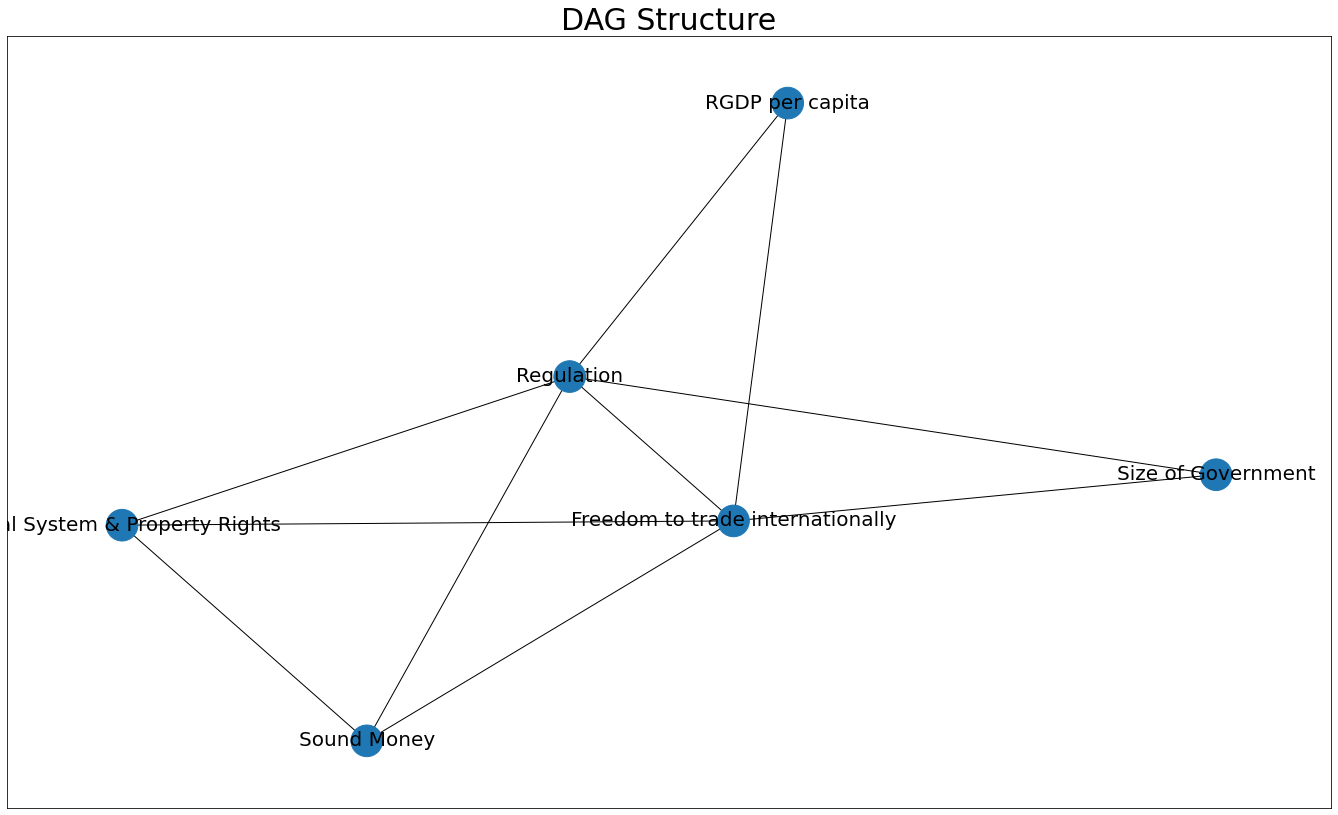

In [82]:
import matplotlib.pyplot as plt
import networkx as nx

def graph_DAG(undirected_graph, df, title = "DAG Structure"):
    pcorr_matrix = df.pcorr()
    graph= nx.Graph()
    edges = []
    edge_labels = {}
    for key in undirected_graph:
        for key2 in undirected_graph[key]:
            if (key2, key) not in edges:
                edge = (key, key2)
                edges.append(edge)
#                 edge_labels[edge] = str(round(pcorr_matrix.loc[key][key2], 2))
    
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]
    
    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)
    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, 
                     pos, 
                     node_color = color_map,
                     node_size=1000,
                    # show node label
                     with_labels = True,
                     arrows = False,
                     font_size = 20,
                     alpha = 1,
                     font_color = "k",
                     ax = ax)
#     nx.draw_networkx_edge_labels(graph,
#                                  pos,
#                                 edge_labels = edge_labels,
#                                  font_color = "green",
#                                  font_size=20)    
    
    plt.show()
    
graph_DAG(undirected_graph, economic_data)